In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_labels = {j:i for i, j in enumerate(class_names)}
print(class_names_labels)
IMAGE_SIZE = (50, 50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


In [3]:
## LOAD DATA - load images and labels from folder


def load_data(): #create a function 
    images=[] #create an empty array for images
    labels=[] #create an empty array for labels
    path = "C:\\Users\\Acer\Desktop\\MACHINE LEARNING\\TML PROJECT DATASET" #declare the path 
    for folder in os.listdir(path): #The function iterates over each folder in the specified path using os.listdir(path). 
        label = class_names_labels[folder] #For each folder, the code retrieves the label associated with that folder using class_names_labels[folder]. 
        for file in os.listdir(os.path.join(path,folder)):
            if file.split('.')[-1] in {'jpg','png', 'jpeg'}: # checks if the file extension is one of {'jpg', 'png', 'jpeg'} 
                img_path = os.path.join(path,folder,file) #constructs the full path to the image file
                img = Image.open(img_path) #open the image path
                img = img.convert('L') #converts the image to RGB mode
                img = img.resize(IMAGE_SIZE) #The image is resized to a specified size (IMAGE_SIZE) which is 50 pixels of width and 50 pixels of height
                
                images.append(img)
                labels.append(label)
    images = np.array([np.array(i) for i in images]) #images converted to numpy array
    labels = np.array([np.array(i) for i in labels]) #labels converted to numpy array
    return images,labels

x,y = load_data() #load_data function is assigned to x and y

In [4]:
print(x.shape, y.shape)

(2400, 50, 50, 3) (2400,)


In [5]:
type(x)

numpy.ndarray

In [6]:
type(y)

numpy.ndarray

In [7]:
y

array([ 0,  0,  0, ..., 19, 19, 19])

In [9]:
from sklearn.model_selection import train_test_split
#train test split for testing set with test size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                   random_state=42) 
#train test split for validation set with test size = 0.25
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train, 
                                                 test_size = 0.25, random_state=0)

In [10]:
print(x_train.shape, x_test.shape, x_valid.shape)

(1440, 50, 50, 3) (480, 50, 50, 3) (480, 50, 50, 3)


In [11]:
print(y_test.shape, y_train.shape, y_valid.shape)

(480,) (1440,) (480,)


In [12]:
#print the dimensions of training, testing and validation set
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_valid.shape)
print(y_train.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(480, 50, 50, 3)
(480, 50, 50, 3)
(480,)
(1440,)
(480,)


In [13]:
#flattening the training, testing and validation of x
x_train_flat = x_train.reshape(
    -1, x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flat = x_test.reshape(
    -1, x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_valid_flat = x_valid.reshape(
    -1, x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3])
print(x_train_flat.shape, x_test_flat.shape, x_valid_flat.shape)

(1440, 7500) (480, 7500) (480, 7500)


In [14]:
x_train_flat = x_train_flat/255
x_valid_flat = x_valid_flat/255
x_test_flat  = x_test_flat/255

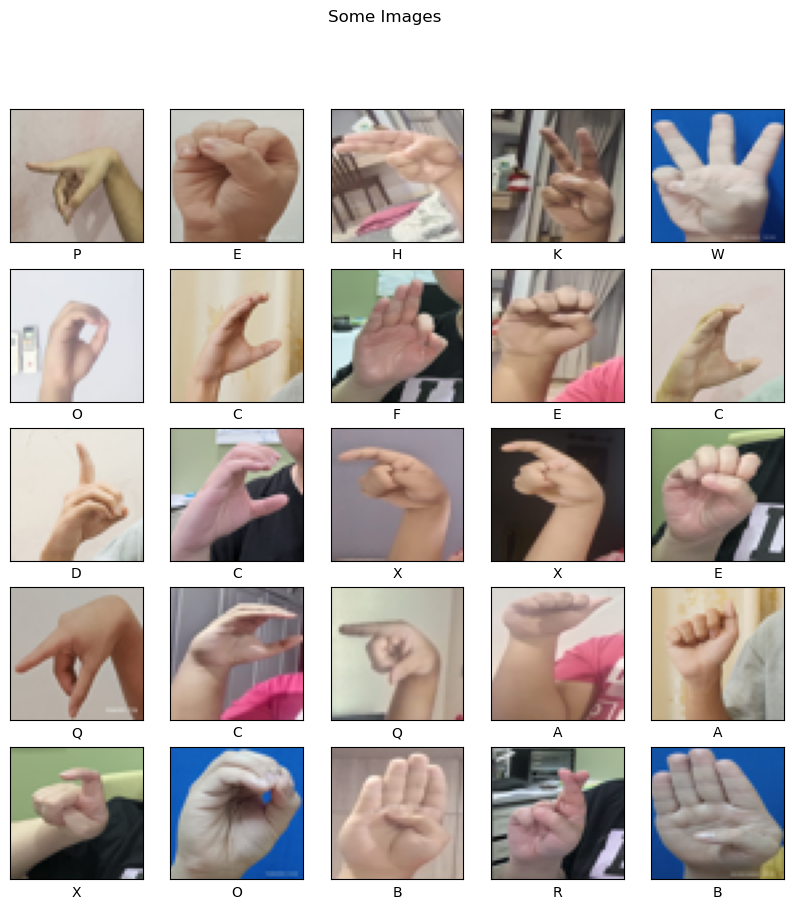

In [15]:
#the images will show in random
random = np.random.choice(len(x_train), size=25, replace=False)

fig = plt.figure(figsize = (10,10))
fig.suptitle("Some Images")
for i, index in enumerate(random):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [31]:
#Import the Logistic Regression that I will use in this project
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100)

In [32]:
lr.fit(x_train_flat, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score
pred = lr.predict(x_train_flat)
print("Training accuracy: ",accuracy_score(y_train,pred))

pred = lr.predict(x_valid_flat)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = lr.predict(x_test_flat)
print("Testing accuracy: ",accuracy_score(y_test,pred))

Training accuracy:  0.9784722222222222
Validation accuracy:  0.6541666666666667
Testing accuracy:  0.6479166666666667


In [34]:
#print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, labels=lr.classes_))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        20
           1       0.55      0.70      0.62        30
           2       0.73      0.67      0.70        24
           3       0.86      0.81      0.83        31
           4       0.60      0.57      0.59        21
           5       0.70      0.56      0.62        25
           6       0.70      0.56      0.62        25
           7       0.76      0.59      0.67        27
           8       0.65      0.88      0.75        25
           9       0.86      0.60      0.71        20
          10       0.89      0.67      0.76        24
          11       0.90      0.75      0.82        24
          12       0.52      0.65      0.58        20
          13       0.53      0.47      0.50        17
          14       0.58      0.63      0.60        30
          15       0.55      0.67      0.60        24
          16       0.38      0.25      0.30        24
          17       0.41    

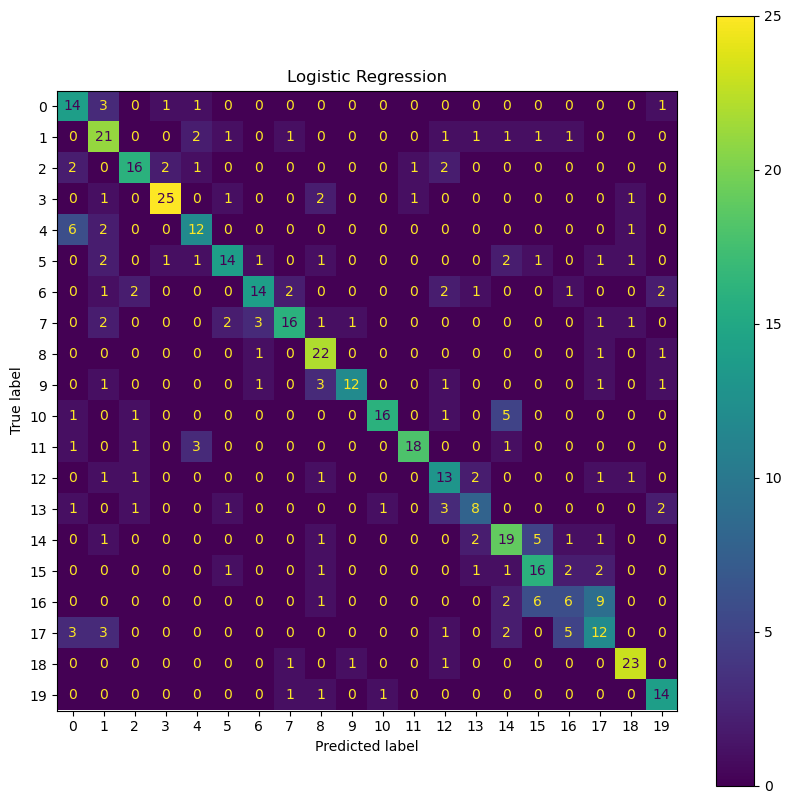

In [35]:
#print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Logistic Regression")
disp.plot(ax=ax)
plt.show()

In [38]:
#Hyperparameter tuning to improve the performance, change the max_iter to 1000 ant set C parameter to 1.0
lr = LogisticRegression(max_iter=1000, C=1.0)
lr.fit(x_train_flat, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [39]:
from sklearn.metrics import accuracy_score
pred = lr.predict(x_train_flat)
print("Training accuracy: ",accuracy_score(y_train,pred))

pred = lr.predict(x_valid_flat)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = lr.predict(x_test_flat)
print("Testing accuracy: ",accuracy_score(y_test,pred)) #now the accuracy is improved to 0.69

Training accuracy:  1.0
Validation accuracy:  0.6770833333333334
Testing accuracy:  0.6916666666666667


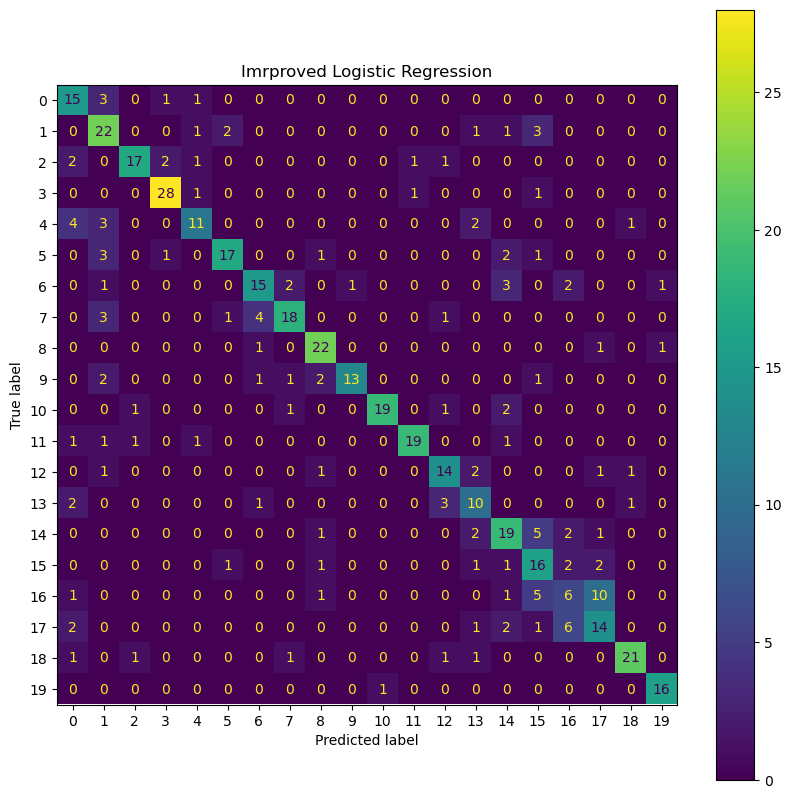

In [40]:
#print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Imrproved Logistic Regression")
disp.plot(ax=ax)
plt.show()

In [41]:
#print classification report of Improved Logistic Regression
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, labels=lr.classes_))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.56      0.73      0.64        30
           2       0.85      0.71      0.77        24
           3       0.88      0.90      0.89        31
           4       0.69      0.52      0.59        21
           5       0.81      0.68      0.74        25
           6       0.68      0.60      0.64        25
           7       0.78      0.67      0.72        27
           8       0.76      0.88      0.81        25
           9       0.93      0.65      0.76        20
          10       0.95      0.79      0.86        24
          11       0.90      0.79      0.84        24
          12       0.67      0.70      0.68        20
          13       0.50      0.59      0.54        17
          14       0.59      0.63      0.61        30
          15       0.48      0.67      0.56        24
          16       0.33      0.25      0.29        24
          17       0.48    

In [ ]:
# APPLY LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=19)

# Fit the LDA model with x_train data
lda.fit(x_train_flat, y_train)

# Transform the dataset using LDA
x_train_lda = lda.transform(x_train_flat)
x_val_lda = lda.transform(x_valid_flat)
x_test_lda = lda.transform(x_test_flat)

print(x_train_lda.shape)
print(x_val_lda.shape)
print(x_test_lda.shape)

(1440, 19)
(480, 19)
(480, 19)


In [ ]:
## APPLY PCA

from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=20)

# Fit the PCA model with x_train data
pca.fit(x_train_flat)


# Transform the dataset using PCA
x_train_pca = pca.transform(x_train_flat)
x_val_pca = pca.transform(x_valid_flat)
x_test_pca = pca.transform(x_test_flat)

print(x_train_pca.shape)
print(x_val_pca.shape)
print(x_test_pca.shape)

(1440, 20)
(480, 20)
(480, 20)


In [ ]:
val_acc = lr.score(x_valid_flat, y_val)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.6895833333333333


In [ ]:
pred = lr.predict(x_test_flat)

In [ ]:
test_acc = lr.score(x_test_flat, y_test)
print("Test accuracy:", test_acc)

Test accuracy: 0.6791666666666667


In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[12  2  1  0  2  1  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 1 15  0  0  0  2  0  1  0  0  0  0  0  0  2  0  0  2  1  0]
 [ 2  0 20  3  2  0  0  0  0  0  0  2  0  0  1  0  0  0  0  0]
 [ 0  0  0 22  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  2  1  1 16  0  0  0  0  0  0  0  3  1  0  0  0  0  1  0]
 [ 0  0  0  0  1 16  0  0  0  0  0  0  1  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 15  4  0  0  0  0  1  1  1  0  0  0  0  1]
 [ 0  2  0  0  0  1  2 15  0  2  0  0  1  1  0  0  1  0  1  0]
 [ 0  0  0  0  0  1  0  0 18  1  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  3  0  2 15  0  0  0  2  0  3  1  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0 20  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1 13  6  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  2 14  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  8  3  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  2 13  3  2

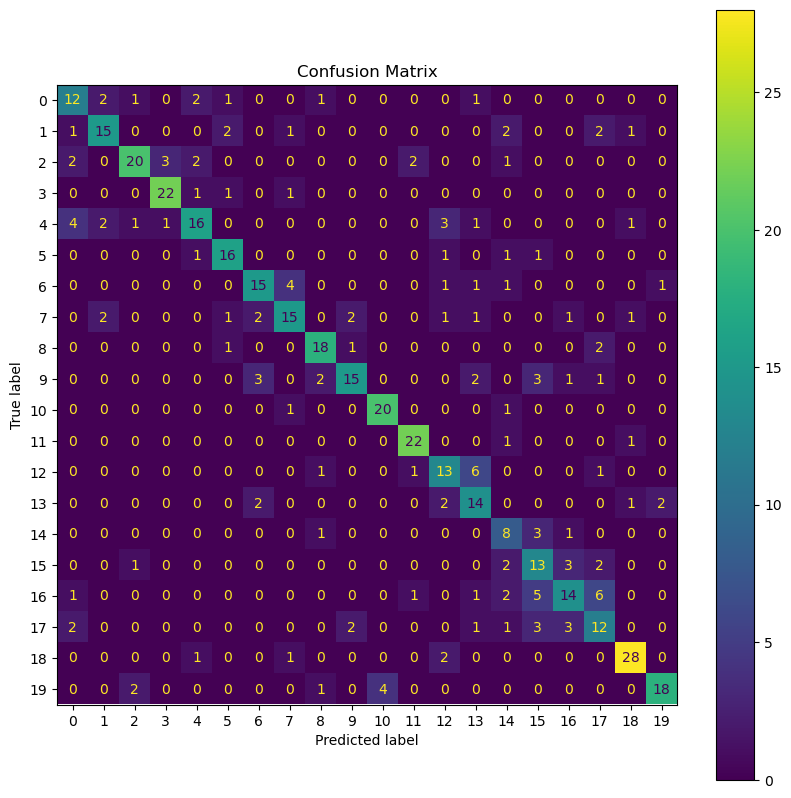

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix = cm,
                            display_labels = lr.classes_)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Confusion Matrix')
cmd.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, labels=lr.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.71      0.62      0.67        24
           2       0.80      0.67      0.73        30
           3       0.85      0.88      0.86        25
           4       0.70      0.55      0.62        29
           5       0.73      0.80      0.76        20
           6       0.68      0.65      0.67        23
           7       0.65      0.58      0.61        26
           8       0.75      0.82      0.78        22
           9       0.75      0.56      0.64        27
          10       0.83      0.91      0.87        22
          11       0.85      0.92      0.88        24
          12       0.57      0.59      0.58        22
          13       0.50      0.67      0.57        21
          14       0.40      0.62      0.48        13
          15       0.46      0.62      0.53        21
          16       0.61      0.47      0.53        30
          17       0.46    

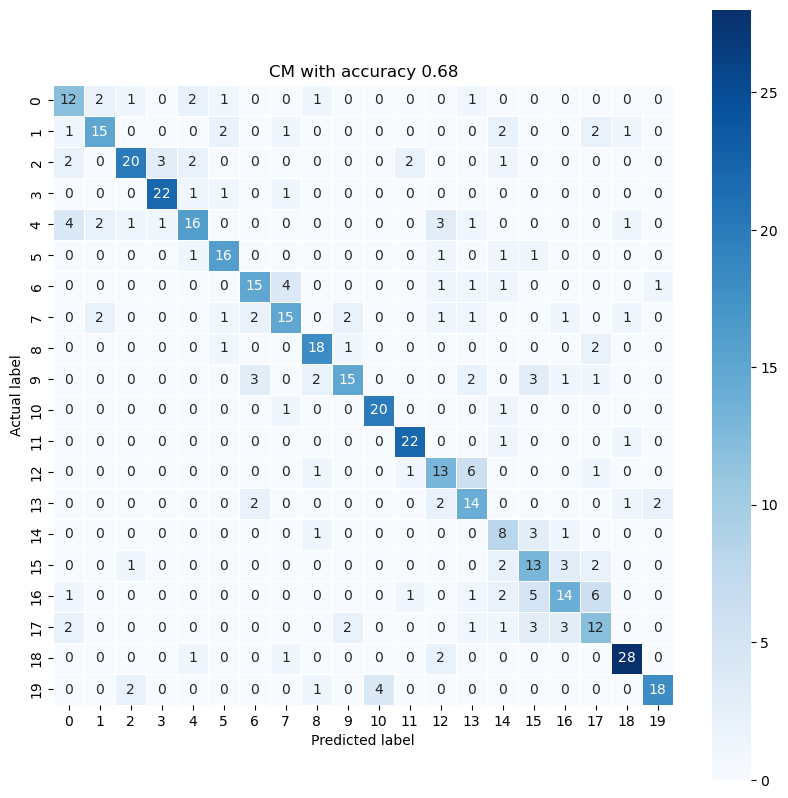

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='d', linewidth=0.5,
           square=True, cmap='Blues')
plt.title("CM with accuracy {:.2f}".format(
metrics.accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
lda.fit(x_train_flat, y_train)
x_train_lda = lda.transform(x_train_flat)
x_test_lda = lda.transform(x_test_flat)

In [ ]:
print(x_train_lda.shape, x_test_lda.shape)

(1440, 19) (480, 19)


In [ ]:
lr.fit(x_train_lda, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred = lr.predict(x_test_lda)

In [ ]:
test_acc = lr.score(x_test_lda, y_test)
print("Test accuracy:", test_acc)

Test accuracy: 0.5354166666666667


In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[11  4  0  0  2  0  0  0  1  0  0  0  0  0  0  1  0  0  0  1]
 [ 2 12  0  0  1  5  0  0  2  0  0  0  1  0  0  0  0  0  0  1]
 [ 0  2 16  1  1  0  0  0  2  1  0  2  0  2  0  1  1  0  0  1]
 [ 1  1  0 14  1  0  0  1  1  0  1  1  1  0  2  0  0  1  0  0]
 [ 4  2  1  0  9  1  1  0  2  0  1  0  2  2  1  0  1  1  0  1]
 [ 0  3  0  0  1 14  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  2  0  0  0  0 10  3  0  1  0  0  2  1  0  2  0  1  0  1]
 [ 0  1  0  0  1  1  3 10  1  1  0  0  5  2  0  0  0  0  1  0]
 [ 1  0  0  0  2  0  1  0 10  0  1  3  2  1  0  1  0  0  0  0]
 [ 0  2  0  1  0  0  0  2  2 10  2  1  2  2  0  1  0  1  1  0]
 [ 1  0  0  0  0  0  0  0  1  0 15  0  1  1  1  0  0  0  0  2]
 [ 0  0  0  3  1  0  0  0  1  0  0 14  1  1  1  0  0  0  1  1]
 [ 0  0  0  0  1  0  0  0  1  0  1  0 12  7  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  1  0  0  0  1  0  2 14  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  5  5  1  0  0  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0 15  3  1

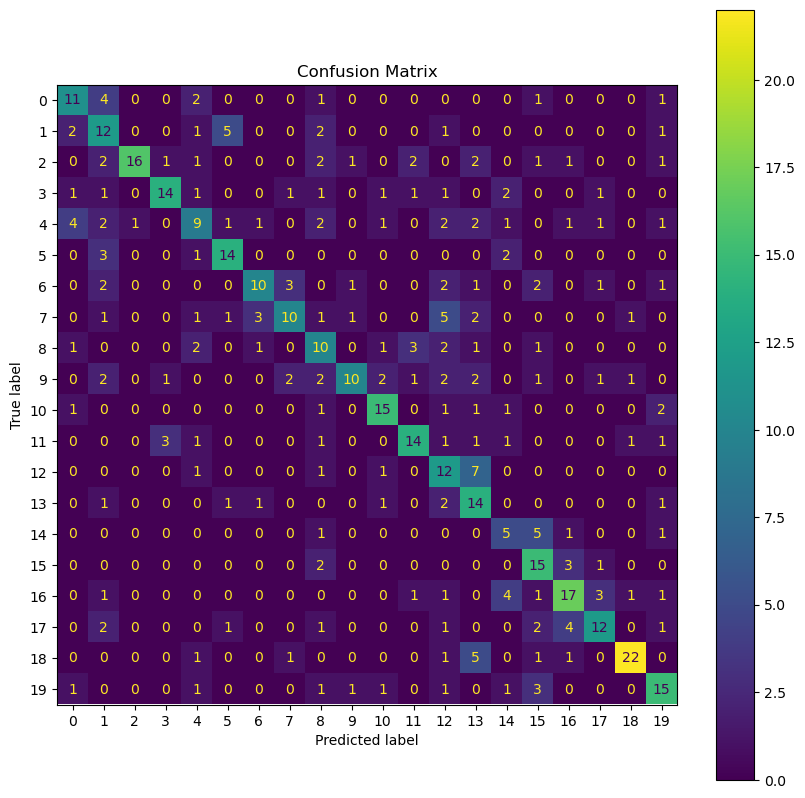

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix = cm,
                            display_labels = lr.classes_)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Confusion Matrix')
cmd.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, labels=lr.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54        20
           1       0.36      0.50      0.42        24
           2       0.94      0.53      0.68        30
           3       0.74      0.56      0.64        25
           4       0.41      0.31      0.35        29
           5       0.61      0.70      0.65        20
           6       0.62      0.43      0.51        23
           7       0.59      0.38      0.47        26
           8       0.34      0.45      0.39        22
           9       0.71      0.37      0.49        27
          10       0.65      0.68      0.67        22
          11       0.64      0.58      0.61        24
          12       0.34      0.55      0.42        22
          13       0.37      0.67      0.47        21
          14       0.29      0.38      0.33        13
          15       0.45      0.71      0.56        21
          16       0.61      0.57      0.59        30
          17       0.60    

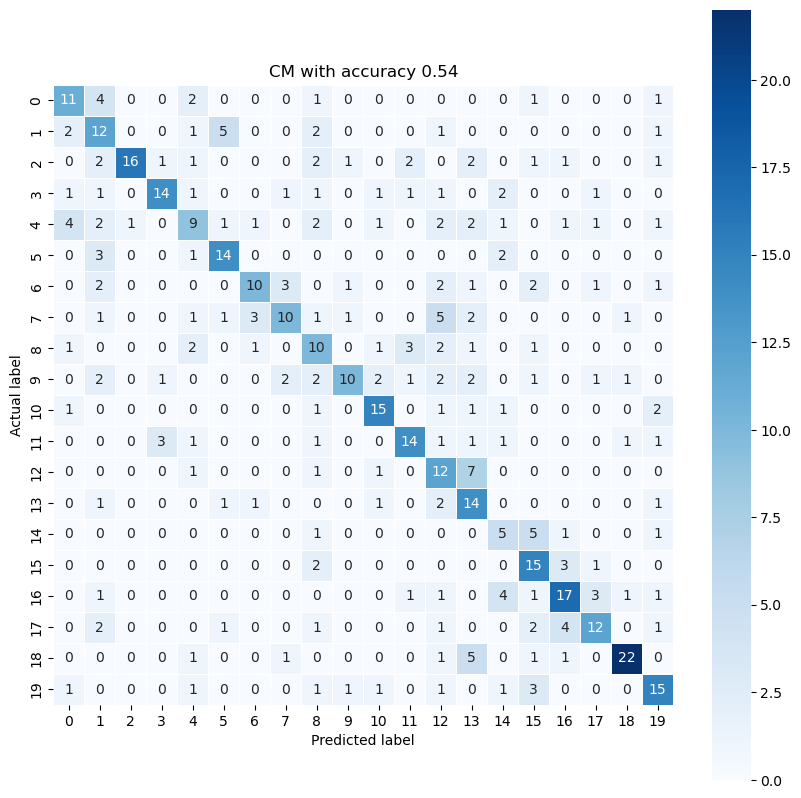

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='d', linewidth=0.5,
           square=True, cmap='Blues')
plt.title("CM with accuracy {:.2f}".format(
metrics.accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
pca.fit(x_train_flat, y_train)
x_train_pca = pca.transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

In [ ]:
print(x_train_pca.shape, x_test_pca.shape)

(1440, 20) (480, 20)


In [ ]:
lr.fit(x_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred = lr.predict(x_test_pca)

In [ ]:
test_acc1 = lr.score(x_test_pca, y_test)
print("Test accuracy:", test_acc1)

Test accuracy: 0.3645833333333333


In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[11  2  0  0  0  2  2  0  0  1  0  1  0  0  0  0  1  0  0  0]
 [ 0 10  0  0  1  5  0  0  0  0  3  0  0  0  1  1  1  1  0  1]
 [ 0  1 11  2  1  3  2  0  0  0  1  3  0  1  0  0  1  0  1  3]
 [ 1  1  0 13  0  0  0  0  3  1  0  0  0  0  2  0  1  0  3  0]
 [ 5  1  1  1  8  3  1  0  0  0  1  1  2  0  0  1  0  1  1  2]
 [ 3  1  0  0  2 12  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 0  1  0  0  0  0  4  4  0  2  0  0  0  5  0  1  0  0  0  6]
 [ 0  3  0  0  1  0  4 11  0  1  1  0  1  3  0  1  0  0  0  0]
 [ 0  2  0  2  1  0  0  0 10  0  1  2  1  0  0  1  0  1  0  1]
 [ 0  3  1  0  1  0  2  1  1  9  1  0  1  2  0  4  0  1  0  0]
 [ 3  2  0  0  0  0  0  0  2  0 14  1  0  0  0  0  0  0  0  0]
 [ 1  0  1  2  0  1  2  0  0  0  1 11  0  0  2  2  0  0  1  0]
 [ 0  3  0  0  0  1  1  1  1  0  0  0  6  7  0  1  0  0  1  0]
 [ 0  1  0  1  1  0  0  2  0  0  0  0  7  6  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  1  2  0  0  0  0  7  3  0  0  0  0]
 [ 1  0  0  0  0  0  2  0  1  2  1  0  0  0  3  4  4  1

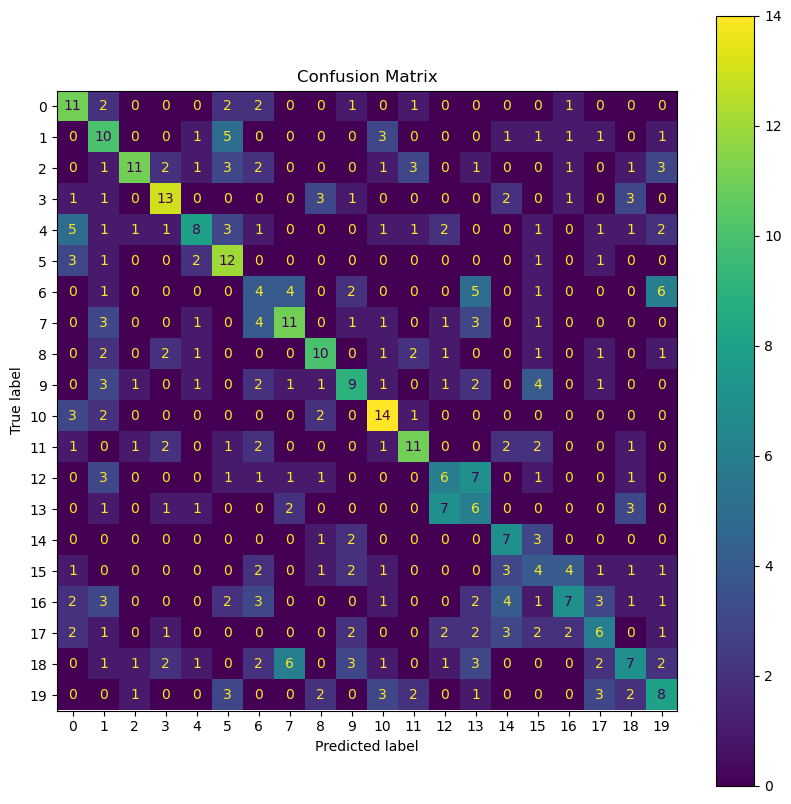

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix = cm,
                            display_labels = lr.classes_)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Confusion Matrix')
cmd.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, labels=lr.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.38      0.55      0.45        20
           1       0.28      0.42      0.33        24
           2       0.69      0.37      0.48        30
           3       0.54      0.52      0.53        25
           4       0.47      0.28      0.35        29
           5       0.38      0.60      0.46        20
           6       0.16      0.17      0.17        23
           7       0.44      0.42      0.43        26
           8       0.48      0.45      0.47        22
           9       0.39      0.33      0.36        27
          10       0.48      0.64      0.55        22
          11       0.52      0.46      0.49        24
          12       0.29      0.27      0.28        22
          13       0.19      0.29      0.23        21
          14       0.32      0.54      0.40        13
          15       0.17      0.19      0.18        21
          16       0.41      0.23      0.30        30
          17       0.30    

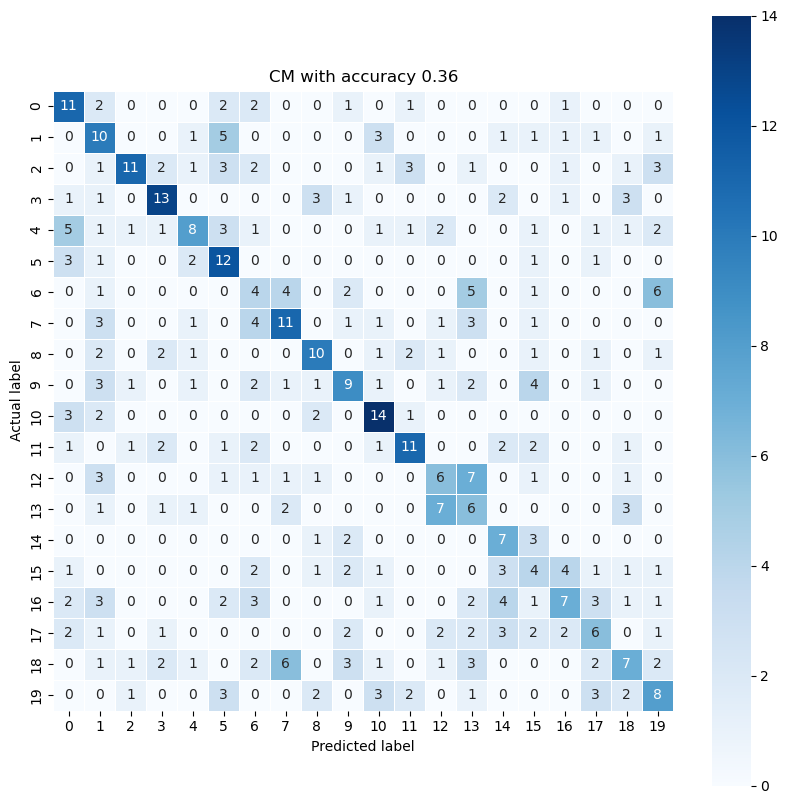

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='d', linewidth=0.5,
           square=True, cmap='Blues')
plt.title("CM with accuracy {:.2f}".format(
metrics.accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()